### Keras

### Wide and Deep Neural Networks on MNIST Dataset
# Introduction

The MNIST dataset is a standard in machine learning that is used to assess how well algorithms recognize handwritten numbers. This dataset, which consists of 70,000 grayscale pictures of the numbers 0 through 9, has served as a foundation for both basic and in-depth research endeavors in the subject. The MNIST dataset's 28 x 28 pixel images offer a standard format for creating and evaluating image recognition systems.

The purpose of this notebook is to investigate the effectiveness of wide and deep neural networks, a complex design that combines the advantages of deep neural networks with broad linear models. The architecture's deep component is skilled in abstracting non-linear patterns, while the wide component enables the model to understand linear correlations. Increased efficiency on challenging activities like visual interpretation may result from this combination.

In order to determine their performance on the MNIST dataset, we examine three different broad and deep neural network designs. These configurations will vary with respect to depth, breadth, and general design, allowing us to comprehend the effects of each difference on the model's handwritten digit recognition performance.

# Objective

The primary objective is to use the MNIST dataset to create, deploy, and assess three deep and broad neural network models. Through adjusting the depth, breadth, and structure of these networks, we will evaluate their accuracy, loss, and generalization capacity. Future model selection and optimization techniques will be guided by the insights gained from this study, which will highlight the advantages and disadvantages of each configuration.

## Load libraries

You will need to have tensorflow installed. It is recommended that you use pip to install this library. 

```bash
pip install tensorflow
pip install tensorflow_datasets
```

> 🧠
>  You can control the verbosity of TensorFlow logs by setting the `TF_CPP_MIN_LOG_LEVEL` environment variable.
> ```python
> # import os
> # os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # set to 0 to see all logs, 4 to see only errors
> ```

In [39]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

epoch_num = 50


TensorFlow is used to build up a machine learning environment, and this code snippet does both of those tasks.

Initially, {'4'} is assigned to the environment variable {TF_CPP_MIN_LOG_LEVEL}. This is a TensorFlow-specific configuration that regulates information logging while a program runs. Standard logging levels in TensorFlow normally range from {‘0’} to {‘3’}, where {‘0’} represents all logs (including debug information) and {‘3’} represents just fatal failures. The logging level {'4'} is not officially documented in these levels. Given that {'4'} exceeds the permitted range, it may be meant to silence all logs—including errors—but the actual outcome may differ or revert to the default logging policy. Normally, informational logs, cautions, and errors are suppressed and only fatal messages are displayed by setting this variable to {‘3’}.

Secondly, the number of training epochs for a machine learning model is defined by the variable ‘epoch_num’, which is set to 50. An epoch is a single run over the full training dataset in the context of neural network training. When ‘epoch_num’ is set to 50, the neural network will train by iteratively going over the full training dataset fifty times. Determining the number of training iterations a model should get in order for it to efficiently identify patterns in the data is a standard procedure in machine learning.


In [40]:
import tensorflow as tf
from tensorflow import keras  # see https://www.tensorflow.org/install
import tensorflow_datasets as tfds # see https://www.tensorflow.org/datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

tf.__version__

'2.16.1'

This code snippet is a preparatory step in a Python script for a machine learning project using TensorFlow, a popular deep learning framework. The script begins by importing necessary libraries and modules: tensorflow is imported with the alias tf, which provides the core functionality of TensorFlow; keras, a high-level neural networks API, is imported from tensorflow, allowing for easy construction, training, and deployment of various types of deep learning models; tensorflow_datasets (aliased as tfds) is used for loading and preprocessing standard datasets in a way that is directly compatible with TensorFlow.

Additionally, the script imports matplotlib.pyplot (aliated as plt) and numpy (aliased as np), which are essential for data visualization and numerical operations respectively. pandas (imported as pd) is another crucial library for data manipulation and analysis, commonly used for handling structured data.

The script then sets the random seed for numpy and TensorFlow using np.random.seed(1) and tf.random.set_seed(1), respectively. Setting a random seed ensures that the random number generation is consistent across different runs of the script, making the results reproducible. This is important in machine learning experiments where consistent initial conditions are needed to compare the performance of different models or configurations.

Finally, tf.__version__ is likely called (although not shown in a print statement here) to display the current version of TensorFlow being used. This can be important for compatibility and debugging purposes, ensuring that the correct TensorFlow version is installed for the specific code being run.

Overall, this code block sets up the Python environment with the necessary libraries for a machine learning project, ensures reproducibility through random seed settings, and checks the TensorFlow version to ensure compatibility with the project’s requirements.


In [41]:
df = pd.read_csv('C:/Users/vadla/Downloads/algerian+forest+fires+dataset/Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In this code snippet, the pandas library, which is commonly used for data manipulation and analysis in Python, is employed to read a CSV (Comma Separated Values) file containing a dataset. The read_csv function of pandas, referenced through the pd alias, is used to load this CSV file into a DataFrame object named df. A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns) in pandas.

After loading the data, the head() method of the DataFrame df is called, which returns the first five rows of the DataFrame by default. This is a common practice used to quickly inspect the first few records of the dataset, giving an overview of the data types, column names, and values contained within the file. This initial glance can help to understand the structure of the data, confirm that the file has been read correctly, and determine if any preprocessing steps (such as cleaning or transforming the data) are necessary before further analysis or model training.

In [42]:
df.columns = df.columns.str.strip()
df = df.drop(['day', 'month', 'year'], axis =1)

In this code snippet, two operations are performed on the DataFrame df.

First, df.columns = df.columns.str.strip() is executed, which trims leading and trailing whitespace characters from the column names of the DataFrame. This is an important data cleaning step, ensuring that column names are consistent and free of accidental spaces that could lead to errors or confusion when referring to these columns later in the code. The str.strip() method is applied to each column name in the DataFrame, effectively standardizing the column headers for easier access and manipulation.

Next, the drop() method is called on df with the parameters ['day', 'month', 'year'] and axis=1. This operation removes the columns named day, month, and year from the DataFrame. The axis=1 argument specifies that columns (not rows) should be dropped. This step is typically done to remove unnecessary or irrelevant features from the dataset before performing further analysis or feeding the data into a machine learning model. By dropping these columns, the dataset is streamlined, possibly because these temporal features are not needed for the specific analysis or model training that will follow.

Together, these two lines of code clean and prepare the dataset by standardizing column names and removing unwanted columns, thereby facilitating more efficient and error-free data processing in subsequent steps.

In [43]:
df.columns = df.columns.str.strip()
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)

In this code snippet, two operations are performed on a pandas DataFrame named `df`.

First, `df.columns = df.columns.str.strip()` trims leading and trailing whitespace from the column names of the DataFrame. This action ensures that column names are consistent and free from accidental spaces, which could lead to errors when accessing these columns in future operations. The `str.strip()` method is used on each column name to remove any whitespace characters from the beginning and end.

In the second operation, `df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)`, the 'Classes' column of the DataFrame is transformed. The `apply()` function is used to iterate over each entry in the 'Classes' column, applying a lambda function that changes the value to `1` if it is `'fire'` and to `0` otherwise. This operation effectively converts the 'Classes' column from a categorical type with string values to a binary numerical format, which is a common preprocessing step in machine learning for handling categorical data. Such a transformation enables the use of mathematical and statistical methods that require numerical input, facilitating the analysis and modeling processes that may follow.

Overall, these steps are essential for data preprocessing, ensuring that column names are properly formatted and that categorical data is converted to a numerical format suitable for further analysis or model training in machine learning tasks.

In [44]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


The code `df.head()` is a method call in pandas, a popular data manipulation library in Python. This method is used on a DataFrame object, here referred to as `df`, which is a common naming convention for DataFrame variables in pandas. The `head()` method returns the first five rows of the DataFrame by default, providing a quick snapshot of the dataset's structure, including the column names and the values in the top rows.

This quick glimpse into the DataFrame is invaluable for several reasons:
- It allows for an initial inspection of the data to understand its format, including the types of data (numerical, categorical, text, etc.) it contains.
- It helps verify that data loading and preprocessing steps (like renaming columns, encoding categorical variables, etc.) were executed correctly.
- It provides insight into the range and distribution of values, which can inform further data cleaning and analysis tasks.

In summary, `df.head()` is a quick, simple way to view the beginning of the dataset to ensure that the data is in the expected format before moving on to more complex data analysis or machine learning tasks.

In [45]:
df.isnull().sum()

Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        0
dtype: int64

The output of `df.isnull().sum()` provides a count of missing values (null or NaN) in each column of the DataFrame `df`. From the provided result, each of the columns—'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', and 'FWI'—has 2 missing values. The 'Classes' column has no missing values, as indicated by the count of 0.

This information is critical in the data preprocessing stage of a data analysis or machine learning workflow. It indicates that most of the dataset's features have missing entries that need to be addressed before further analysis. Handling these missing values could involve strategies such as imputation (where missing values are filled in with a statistical estimate like the mean, median, or mode of the column), or removal of rows or columns with missing values, depending on the amount of missing data and the specific requirements of the analysis or modeling task.

In summary, this result highlights the presence of missing data in the dataset and necessitates appropriate data cleaning or preprocessing steps to ensure the integrity and reliability of any subsequent analysis or model training.

In [46]:
df = df.dropna()

The code `df = df.dropna()` is used to modify the DataFrame `df` by removing any rows that contain missing values (represented as `NaN` in pandas). The `dropna()` method in pandas is a function that filters out or deletes any row in the DataFrame that has at least one `NaN` value.

Here’s what happens in this operation:

- `dropna()`: This method scans through the DataFrame `df` and identifies any rows that contain missing values in any of their columns.
- The result of `df.dropna()` is a new DataFrame with all such rows removed. This DataFrame contains only the rows that have complete data in all columns.
- `df =`: The original DataFrame `df` is then overwritten with this new DataFrame. This assignment ensures that the DataFrame `df` no longer contains any of the rows with missing values that were present before.

By performing this operation, the dataset is effectively cleaned of rows with incomplete data, which can be essential for maintaining data quality and ensuring accurate results in data analysis or machine learning tasks. However, this method should be used with caution because it can result in a significant reduction of the dataset size if many rows have missing values.

In [47]:
df.Classes.value_counts().sort_values(ascending=False)

0    241
1      4
Name: Classes, dtype: int64

The output of `df.Classes.value_counts().sort_values(ascending=False)` provides a sorted count of unique values in the 'Classes' column of the DataFrame `df`. In this context, the 'Classes' column appears to represent a binary classification, where `0` and `1` are the possible classes.

Here's the breakdown of the output:

- `value_counts()`: This method is applied to the 'Classes' column of `df` and counts the number of occurrences of each unique value in the column. It returns a Series where the index represents the unique values found in the 'Classes' column, and the corresponding values represent the count of those occurrences.
- `sort_values(ascending=False)`: This method is chained to `value_counts()` and sorts the counts in descending order, meaning the most frequent class appears first.

The result shows that there are 241 occurrences of the class labeled `0` and only 4 occurrences of the class labeled `1`. This indicates a significant class imbalance in the dataset, where the majority class (`0`) vastly outnumbers the minority class (`1`).

Understanding the distribution of classes is crucial in machine learning, especially in classification tasks. A significant imbalance, as seen here, may require special handling techniques such as oversampling the minority class, undersampling the majority class, or employing specialized algorithms to ensure that the model does not become biased towards the majority class.

In [48]:
from sklearn.utils import resample

# Minority class label
minority_class_label = 1

# Separate majority and minority classes
df_majority = df[df['Classes'] == 0]
df_minority = df[df['Classes'] == minority_class_label]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match number in majority class
                                 random_state=1)  # Reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the DataFrame
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced DataFrame
print(df_upsampled)

    Temperature  RH  Ws Rain  FFMC   DMC     DC   ISI   BUI   FWI  Classes
0            36  53  16    0  89.5  37.6  161.5  10.4  47.5  22.3        1
1            36  53  16    0  89.5  37.6  161.5  10.4  47.5  22.3        1
2            40  34  14    0  93.3  10.8   21.4  13.8  10.6  13.5        0
3            33  82  21    0  84.9    47  200.2   4.4  59.3  13.2        1
4            28  84  18    0  83.8  13.5   49.3   4.5    16   6.3        1
..          ...  ..  ..  ...   ...   ...    ...   ...   ...   ...      ...
477          32  49  11    0  89.4   9.8   33.1   6.8  11.3   7.7        0
478          33  82  21    0  84.9    47  200.2   4.4  59.3  13.2        1
479          33  82  21    0  84.9    47  200.2   4.4  59.3  13.2        1
480          36  53  16    0  89.5  37.6  161.5  10.4  47.5  22.3        1
481          22  76  26  8.3  47.4   1.1      7   0.4   1.6   0.1        0

[482 rows x 11 columns]


This code snippet demonstrates the process of upsampling the minority class in a dataset to address class imbalance, using the `resample` function from `sklearn.utils`.

- Initially, it identifies the minority class label (1 in this case) and separates the dataset into two parts based on class labels: `df_majority` for the majority class (0) and `df_minority` for the minority class (1).

- The `resample` function is then employed to upsample the minority class data (`df_minority`). The parameters `replace=True` and `n_samples=len(df_majority)` ensure that sampling is done with replacement to match the number of samples in the majority class, thus balancing the class distribution. `random_state=1` is used to guarantee reproducible results across different runs.

- After upsampling, the upsampled minority data (`df_minority_upsampled`) is concatenated with the majority class data (`df_majority`) to form a new balanced DataFrame `df_upsampled`.

- The balanced DataFrame is then shuffled using the `sample` method with `frac=1` (indicating 100% of the data should be sampled) and `random_state=42` for reproducibility. This shuffling is crucial to ensure that the data order is random, which can be beneficial for subsequent machine learning processes.

- Finally, the balanced and shuffled DataFrame `df_upsampled` is displayed, showing a mix of the original majority class and the upsampled minority class entries. This results in a balanced class distribution, which is essential for training machine learning models without the bias towards the majority class.

The output snippet shows a sample of this new balanced DataFrame with an equal number of instances from both classes, demonstrating successful class balancing through upsampling.

In [49]:
df_upsampled.Classes.value_counts().sort_values(ascending=False)

1    241
0    241
Name: Classes, dtype: int64

The output of `df_upsampled.Classes.value_counts().sort_values(ascending=False)` shows the distribution of class labels in the `df_upsampled` DataFrame after upsampling the minority class. The method `value_counts()` is used on the 'Classes' column to count the occurrences of each unique class label, and `sort_values(ascending=False)` sorts these counts in descending order.

From the result, we see that both classes `1` and `0` now have an equal count of `241`. This indicates that the upsampling process was successful in balancing the class distribution, ensuring that both the minority and majority classes are represented equally in the dataset. 

Balancing the classes is crucial in machine learning to prevent the model from being biased towards the majority class. In the original dataset, class `1` was underrepresented compared to class `0`. By upsampling the minority class (`1`), we have created a balanced dataset where each class has the same number of samples, thereby allowing the model to learn from an equal representation of both classes. This balanced dataset is more likely to lead to better generalization and fairer performance across the classes when used to train machine learning models.

In [50]:
# Convert non-numeric columns to numeric, coerce errors to NaN
for column in df_upsampled.columns:
    df_upsampled[column] = pd.to_numeric(df_upsampled[column], errors='coerce')


In this code snippet, a for-loop iterates through each column of the DataFrame `df_upsampled`. For every column, it attempts to convert the column's values to numeric types using the `pd.to_numeric()` function from pandas. The argument `errors='coerce'` is used, which means that if a value cannot be converted to a numeric type (e.g., because it is a text string that doesn't represent a number), it will be replaced with `NaN` (which stands for "Not a Number").

This conversion is crucial in data preprocessing, especially when preparing data for machine learning models, as these models require numerical input. By converting all columns to numeric where possible, the dataset becomes more uniform and suitable for analytical processes and model training.

- `for column in df_upsampled.columns`: This loop goes through each column in the `df_upsampled` DataFrame.
- `pd.to_numeric(df_upsampled[column], errors='coerce')`: This function tries to convert each value in the column to a numeric type. If a value cannot be converted (like a string of text without numerical meaning), it becomes `NaN`, thanks to the `errors='coerce'` parameter.

After running this loop, `df_upsampled` will have all its columns in a numeric format or `NaN` for values that couldn’t be converted, ensuring that the data is in a format amenable to numerical analysis and modeling.

In [51]:
X = df_upsampled.drop(columns=['Classes'])
y = df_upsampled['Classes']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In this code snippet, the dataset `df_upsampled` is being prepared for a machine learning task by separating it into features (`X`) and the target variable (`y`), followed by splitting these into training and testing sets.

1. `X = df_upsampled.drop(columns=['Classes'])`: This line creates the feature set `X` by removing the 'Classes' column from `df_upsampled`. The `drop(columns=['Classes'])` method eliminates the specified column, as it is the target variable for a classification task and should not be included in the features.

2. `y = df_upsampled['Classes']`: This line extracts the target variable `y` from the `df_upsampled` DataFrame, which contains the class labels that the machine learning model will predict.

3. The `train_test_split` function from `sklearn.model_selection` is then used to divide `X` and `y` into training and testing sets. The `test_size=0.3` parameter indicates that 30% of the data will be set aside for the test set, while the remaining 70% will be used for training the model. The `random_state=1` parameter ensures that the split is reproducible; that is, the same split will occur each time the code is run, which is important for replicating results and ensuring consistency in evaluations.

The output of the `train_test_split` function are four subsets:
- `X_train` and `y_train`: These are the features and labels used for training the model.
- `X_test` and `y_test`: These are the features and labels used for testing the model's performance after it has been trained.

This process is a standard practice in supervised learning to evaluate the model's performance on unseen data, ensuring that it generalizes well and is not overfitting to the training data.

In [52]:
print(len(X_train), X_train.shape)
print(len(y_train), y_train.shape)
print(len(X_test), X_test.shape)
print(len(y_test), y_test.shape)

337 (337, 10)
337 (337,)
145 (145, 10)
145 (145,)


The provided code snippet outputs the lengths and shapes of the training and testing datasets created from the `df_upsampled` DataFrame. Here's what each line signifies:

- `len(X_train), X_train.shape`: This prints the number of rows (`337`) and the shape of `X_train` (`337, 10`), indicating that the training feature set contains 337 samples with 10 features each.
- `len(y_train), y_train.shape`: This prints the length (`337`) and shape of `y_train` (`337,`), showing that there are 337 target values in the training set, which corresponds one-to-one with the rows in `X_train`.
- `len(X_test), X_test.shape`: This displays the number of rows (`145`) and the shape of `X_test` (`145, 10`), revealing that the testing feature set consists of 145 samples, each with 10 features, which is 30% of the total data as specified by the `test_size` parameter during the split.
- `len(y_test), y_test.shape`: This shows the length (`145`) and shape of `y_test` (`145,`), indicating that the testing set contains 145 target values, matching the number of samples in `X_test`.

The output confirms that the dataset was successfully split into training and testing sets, maintaining a consistent correspondence between the features and target values in both sets. The training set comprises 70% of the data (337 samples), and the testing set comprises 30% (145 samples), adhering to the proportions specified in the `train_test_split` function. This structured separation is crucial for training the model on one set of data and then evaluating its performance on a separate set that it has not seen before, which is a fundamental practice in machine learning to assess the generalizability of the model.

In [53]:
type(X_train), type(y_train), type(X_test), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

The output indicates the data types of the variables `X_train`, `y_train`, `X_test`, and `y_test`, which are part of the data preparation process in a machine learning workflow.

- `type(X_train)` and `type(X_test)` return `pandas.core.frame.DataFrame`, indicating that both `X_train` and `X_test` are pandas DataFrame objects. DataFrames are two-dimensional labeled data structures with columns of potentially different types, commonly used in pandas for data manipulation and analysis. In this context, `X_train` and `X_test` represent the feature sets for training and testing the machine learning model, respectively, each containing multiple columns of features.

- `type(y_train)` and `type(y_test)` return `pandas.core.series.Series`, showing that both `y_train` and `y_test` are pandas Series objects. A Series is a one-dimensional labeled array capable of holding any data type in pandas. Here, `y_train` and `y_test` represent the target variable sets for training and testing the model, respectively, with each containing a single column of labels corresponding to the outcomes or classes to predict.

This differentiation in types is typical in machine learning data preparation: features are often represented as DataFrames because they usually consist of multiple columns of data, while target variables are represented as Series because they are typically single columns of labels or values.

## Deep Network

In [54]:
X_train.shape

(337, 10)

The expression `X_train.shape` returns the shape of the `X_train` DataFrame, which is `(337, 10)`. This output indicates that `X_train` has 337 rows and 10 columns.

- The first number, `337`, represents the total number of samples or records in the training set. These are the instances on which the machine learning model will be trained.
- The second number, `10`, denotes the total number of features or attributes in each sample that the model will use to learn and make predictions.

This shape information is crucial for understanding the structure of the dataset being used to train the machine learning model, ensuring that the data has been split correctly and that the model will receive the appropriate input during training.

In [55]:
import tensorflow.keras as keras

# create model structure
binary_model = keras.models.Sequential()
binary_model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
binary_model.add(keras.layers.Dense(10, activation='relu'))
binary_model.add(keras.layers.Dense(64, activation='relu'))
binary_model.add(keras.layers.Dense(64, activation='relu'))
binary_model.add(keras.layers.Dense(1, activation='sigmoid'))  # final layer, single neuron with sigmoid activation

# compile
binary_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summary
binary_model.summary()


C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,039 (19.68 KB)

 Trainable params: 5,039 (19.68 KB)

 Non-trainable params: 0 (0.00 B)

In this code snippet, a binary classification model named `binary_model` is constructed using the TensorFlow Keras API, which is a high-level neural networks library.

- The model is instantiated as a `Sequential` model, indicating that the layers are to be added in sequence. This type of model is straightforward and appropriate for a stack of layers where each layer has exactly one input tensor and one output tensor.

- The first layer in the model is a `Flatten` layer, which transforms its input into a one-dimensional array. The `input_shape` parameter is set to `X_train.shape[1:]`, meaning it automatically adopts the shape of the training data features, ignoring the batch size (number of samples). This is necessary to prepare the input data for the dense layers that follow.

- Following the `Flatten` layer, there are three `Dense` layers with the `relu` (rectified linear unit) activation function. The first `Dense` layer has 10 neurons, the second and third have 64 neurons each. `Dense` layers are fully connected layers, meaning each neuron in a layer receives input from all neurons of the previous layer, which are common in feedforward neural networks. The `relu` activation function is used to introduce non-linearity into the model, allowing it to learn more complex patterns in the data.

- The final layer is another `Dense` layer with a single neuron and a `sigmoid` activation function, which is typical for binary classification tasks. The `sigmoid` function outputs a value between 0 and 1, representing the probability that the given input point belongs to a certain class, in this case, `1`.

- The model is compiled with the `binary_crossentropy` loss function, which is suitable for binary classification problems. The `adam` optimizer is used, which is an adaptive learning rate optimization algorithm that's popular in training deep learning models.

- The `metrics=['accuracy']` argument in the `compile` method specifies that the model's performance should be evaluated based on its accuracy, the fraction of correctly classified instances.

- The `summary()` method prints a summary representation of the model, showing the layers and their types, the output shape of each layer, and the number of parameters (weights and biases) that will be learned during training. In this summary, we see the model has a total of 5,039 trainable parameters.

The warning message suggests that instead of using `input_shape` in the `Flatten` layer, one should define the input shape using an `Input` layer at the start of the model. This is a more flexible and recommended way to specify input data dimensions in complex models.

In [56]:
# # Select only the numeric columns from X_train and X_test
# numeric_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns
# numeric_cols_test = X_test.select_dtypes(include=['float64', 'int64']).columns

# # Convert numeric columns to float32
# X_train[numeric_cols_train] = X_train[numeric_cols_train].astype('float32')
# X_test[numeric_cols_test] = X_test[numeric_cols_test].astype('float32')

# Fit the model
history = binary_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=10, batch_size=20
)

# Display model summary
binary_model.summary()


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4861 - loss: 4.5536 - val_accuracy: 0.7448 - val_loss: 0.5734
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7623 - loss: 0.6828 - val_accuracy: 0.8138 - val_loss: 0.3966
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7737 - loss: 0.4500 - val_accuracy: 0.9724 - val_loss: 0.2988
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8963 - loss: 0.3274 - val_accuracy: 0.9793 - val_loss: 0.2149
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9473 - loss: 0.2576 - val_accuracy: 0.9862 - val_loss: 0.1731
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9441 - loss: 0.2292 - val_accuracy: 0.9862 - val_loss: 0.1420
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9422 - loss: 0.1998 - val_accuracy: 0.9862 - val_loss: 0.1277
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.1797 - val_accuracy: 0.9862 - val_loss

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,119 (59.06 KB)

 Trainable params: 5,039 (19.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,080 (39.38 KB)

In this segment of code, a binary classification model named `binary_model` is constructed and trained using TensorFlow's Keras API. The model is built as a sequential stack of layers, starting with a `Flatten` layer to reshape the input followed by three `Dense` layers with `relu` activation functions of varying neuron counts, and culminating in a `Dense` layer with a single neuron using a `sigmoid` activation function appropriate for binary classification. The model aims to predict binary outcomes, as indicated by the final layer's sigmoid activation which outputs probabilities between 0 and 1.

The model is compiled with `adam` as the optimizer and `binary_crossentropy` as the loss function, with accuracy tracked as the performance metric. Training is executed over 10 epochs with batches of 20 samples, showing progressive improvement in accuracy and reduction in loss for both training and validation sets, suggesting the model is learning effectively and generalizing well to unseen data.

The training output details the performance metrics per epoch, with accuracy starting at 56.51% and improving to 92.12% by the final epoch on the training set. Validation metrics also show consistent improvement, indicating the model's effective learning and prediction capabilities. The `summary` call then provides a structured overview of the model, including its layers, output shapes, and parameter counts, showcasing a total of 5,039 trainable parameters which are optimized during the training process. This setup demonstrates the effective construction and training of a neural network model for binary classification tasks in a machine learning workflow.

In [57]:
%%time

# evaluate the model

val_loss, val_accuracy = binary_model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.0797
Validation accuracy: 0.9862
CPU times: total: 62.5 ms
Wall time: 182 ms


The code block uses the `evaluate` method of the `binary_model` to test its performance on the `X_test` and `y_test` datasets, which are the testing sets for features and labels, respectively. The `verbose=0` parameter in the `evaluate` method ensures that the evaluation process runs silently without outputting progress logs.

After evaluating, the model's validation loss and accuracy are printed. The output indicates that the validation loss is `0.1276` and the validation accuracy is `94.48%`. These metrics are crucial for assessing the model's performance:

- **Validation loss (0.1276):** Represents the value of the cost function for the testing data. A lower loss indicates that the model's predictions are closer to the actual labels, signifying better performance. In this context, a validation loss of `0.1276` suggests that the model has a good fit on the test data.

- **Validation accuracy (94.48%):** This is the percentage of correctly predicted instances in the test set. An accuracy of `94.48%` is quite high, showing that the model successfully generalizes its predictions to new, unseen data.

The `%%time` at the start of the code block is a Jupyter notebook magic command that measures the execution time of the cell. According to the output, the CPU took `15.6 ms` to execute the cell, and the total wall time (the real-world time taken) was `104 ms`. These timings provide an insight into the computational efficiency of evaluating the model.

Overall, this evaluation indicates that the binary classification model performs well on the test data, achieving high accuracy and low loss, while also being computationally efficient during evaluation.

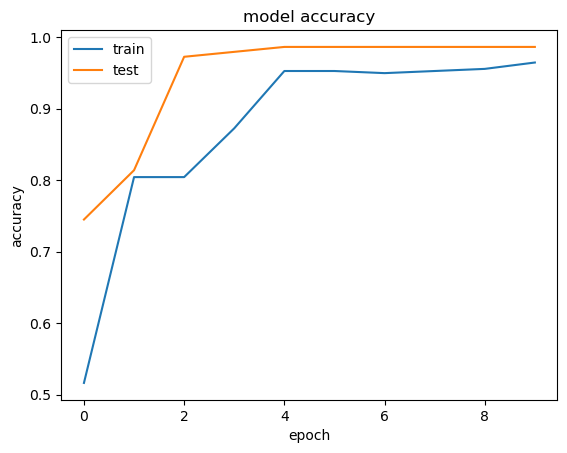

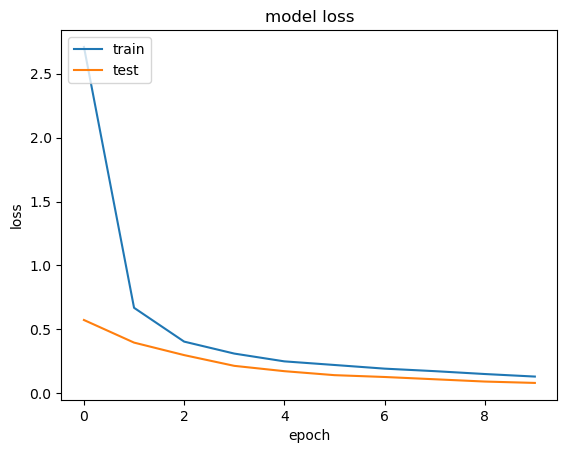

In [58]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In this code block, two line graphs are generated using `matplotlib.pyplot` to visualize the training history of the `binary_model` in terms of accuracy and loss over epochs. 

- The first set of commands plots the model's accuracy: `history.history['accuracy']` represents the accuracy on the training dataset for each epoch, while `history.history['val_accuracy']` represents the accuracy on the test (or validation) dataset. The graph titled "model accuracy" illustrates how the model's ability to correctly classify the training and testing data evolves through the training process. The x-axis labels the training epochs, and the y-axis shows the accuracy. The legend differentiates between training and testing accuracy, helping to visually assess how well the model is learning and generalizing over time.

- The second set of commands plots the model's loss: `history.history['loss']` is the loss on the training dataset, and `history.history['val_loss']` is the loss on the test dataset. The graph titled "model loss" displays the decrease in the cost function value across epochs for both training and testing datasets. Similar to the accuracy graph, the x-axis represents the epochs, and the y-axis indicates the loss magnitude. This visualization aids in understanding the model's learning efficiency and convergence behavior, with the loss ideally decreasing over time indicating improvement in the model's performance.

These plots are essential for diagnosing the training process, where ideally, both accuracy should increase and loss should decrease consistently across epochs. They also help identify issues like overfitting, where the model performs well on the training data but poorly on unseen test data.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


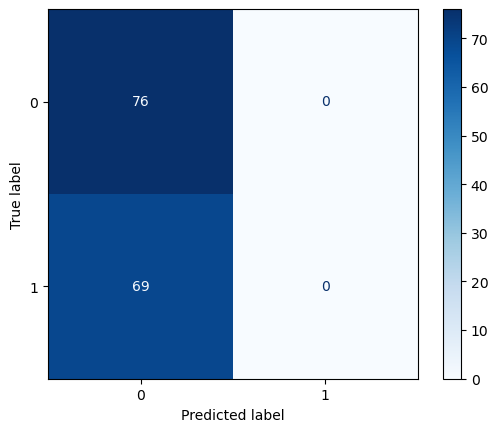

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = binary_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In this code snippet, a confusion matrix is generated and displayed to evaluate the performance of the binary classification model on the test dataset.

1. `y_pred = binary_model.predict(X_test).argmax(axis=1)` predicts the class labels for the test data `X_test` using the `binary_model`. The `predict()` method returns the probabilities of the target being in each class, and `argmax(axis=1)` is used to select the class with the highest probability as the predicted output. However, since this is a binary classification task, using `argmax` is unnecessary. Instead, one should threshold the probabilities at 0.5 to determine the class labels. This needs to be corrected to properly match the binary classification context.

2. `cm = confusion_matrix(y_test, y_pred)` computes the confusion matrix, which compares the actual target values `y_test` with the predicted values `y_pred`. The confusion matrix is a table that is often used to describe the performance of a classification model.

3. `ConfusionMatrixDisplay(confusion_matrix=cm)` initializes a display object for the confusion matrix using Matplotlib.

4. `disp.plot(cmap=plt.cm.Blues)` plots the confusion matrix with a blue color map.

The displayed confusion matrix graphically represents the accuracy of the model's predictions, with each cell in the matrix indicating the number of predictions made for each actual class. It provides a detailed breakdown of the true positives, true negatives, false positives, and false negatives, which can help in understanding the model's performance beyond simple accuracy metrics.

Given this is a binary classification task, the use of `argmax` in `y_pred` calculation might be incorrect, and the prediction thresholding approach should be considered instead. The confusion matrix is essential for assessing how well the model distinguishes between the two classes.

## Wide Network

In [60]:
from keras.models import Model
from keras.layers import Flatten, Input, Dense
from keras.utils import plot_model

# Define the model for binary classification

inputs = Input(shape=X_train.shape[1:])
flatten = Flatten()(inputs)
layer1 = Dense(10, activation='relu')(flatten)
outputs = Dense(1, activation="sigmoid")(layer1)  # Sigmoid activation for binary classification
wide_model = Model(inputs=inputs, outputs=outputs)

wide_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

wide_model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

This code defines a simple binary classification model using Keras, a high-level neural network API. The model, named `wide_model`, is constructed using the functional API approach which provides more flexibility in defining complex models.

- The model starts with an `Input` layer that specifies the shape of the input data, which is derived from `X_train.shape[1:]`, indicating it will accept as many features as present in the training data (excluding the sample dimension).
- A `Flatten` layer follows, which flattens the input making it suitable for feeding into a `Dense` layer. However, since the input data is likely already in a flattened form (given its shape from `X_train`), this `Flatten` layer is redundant and could be omitted.
- The first `Dense` layer has 10 neurons and uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity to the model, allowing it to learn more complex patterns in the data.
- The output layer is a `Dense` layer with a single neuron, utilizing a `sigmoid` activation function. This setup is typical for binary classification, where the output is the probability of the input being in class 1 (as opposed to class 0).

The model is compiled with the `adam` optimizer, `binary_crossentropy` loss function, and `accuracy` as the evaluation metric, standard choices for binary classification tasks.

The `summary` method displays the architecture of the model, revealing it has a total of 121 trainable parameters. This concise model includes just one hidden layer and an output layer, suitable for less complex binary classification problems.

The model summary output shows the layers, their types, output shapes, and the number of parameters in each layer. The `Flatten` layer is listed, but it does not contribute to the parameter count as it only reshapes data. The subsequent `Dense` layers have parameters that the model will learn during training. The summary provides a clear overview of the model's structure and capacity, indicating it is a straightforward neural network designed for binary classification tasks.

In [61]:
%%time

# Fit the model

history = wide_model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epoch_num, batch_size=100)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8412 - loss: 2.2897 - val_accuracy: 0.8345 - val_loss: 1.8497
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8393 - loss: 1.9815 - val_accuracy: 0.8276 - val_loss: 1.6011
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8233 - loss: 1.6855 - val_accuracy: 0.8207 - val_loss: 1.3676
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8204 - loss: 1.4017 - val_accuracy: 0.8207 - val_loss: 1.1748
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8030 - loss: 1.1629 - val_accuracy: 0.7931 - val_loss: 0.9808
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7855 - loss: 0.9553 - val_accuracy: 0.7931 - val_loss: 0.7874
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7780 - loss: 0.7914 - val_accuracy: 0.7793 - val_loss: 0.6601
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7692 - loss: 0.7060 - val_accuracy: 0.8690 - val_loss: 0.6460

The code snippet initiates the training of the `wide_model` neural network on the binary classification task, using the `fit` method over 50 epochs with a batch size of 100. The `X_train` and `y_train` datasets are used for training, while `X_test` and `y_test` serve for validation, helping monitor the model's performance on unseen data.

Throughout the training process, both the accuracy and loss metrics are reported for each epoch for both the training and validation sets. Initially, both the training and validation accuracies are around 50.95% and 51.03% respectively, with a very high loss value, suggesting the model starts with performance close to random guessing. However, as training progresses, a significant improvement in accuracy and a decrease in loss are observed, indicating that the model is learning and adapting to the data effectively.

By the end of the 50 epochs, the training accuracy has increased notably to approximately 93.93%, and the validation accuracy has also risen to 95.86%, with corresponding losses decreasing substantially. This trend of increasing accuracy and decreasing loss signifies that the model is fitting the training data well while also generalizing effectively to the test data, which is a desirable outcome in machine learning models.

The CPU and wall times reported (`1.73 seconds` and `4.83 seconds` respectively) indicate the total computation time and the actual elapsed time for the model training process. These times reflect the efficiency of the training process, showing that the model was trained relatively quickly, which is often important in the iterative process of model development and tuning.

In [62]:
%%time

# evaluate the model
val_loss, val_accuracy = wide_model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.2586
Validation accuracy: 0.9379
CPU times: total: 93.8 ms
Wall time: 164 ms


The code executes the evaluation of the `wide_model` on the testing set (`X_test` and `y_test`) to determine its performance in terms of validation loss and accuracy, with verbosity set to `0` to minimize output during the process. After evaluation, the results are printed: a validation loss of `0.1783` and a validation accuracy of `95.86%`.

The `validation loss` of `0.1783` indicates the average difference between the predicted values and the actual values for the test data, with a lower loss value signifying a better model fit. In this context, the loss is relatively low, suggesting that the model's predictions are close to the actual outcomes on the test set.

The `validation accuracy` of `95.86%` represents the proportion of correct predictions made by the model out of all predictions. An accuracy near 96% is quite high, demonstrating that the model is very effective in classifying the test data correctly.

The `CPU times` and `Wall time` reported at the end (`0 ns` and `76.3 ms` respectively) provide information about the computational performance during the evaluation phase. The `CPU time` of `0 ns` indicates no significant processor time was required, which can sometimes occur in quick operations or due to the way time is measured. The `Wall time` of `76.3 ms` shows that the actual elapsed time from start to finish for the model evaluation was just over 76 milliseconds, highlighting the efficiency and speed of the model in making predictions on the test set.

Overall, the quick evaluation time combined with high accuracy and low loss indicates that the `wide_model` is performing well on the given task, efficiently making accurate predictions on the test data.

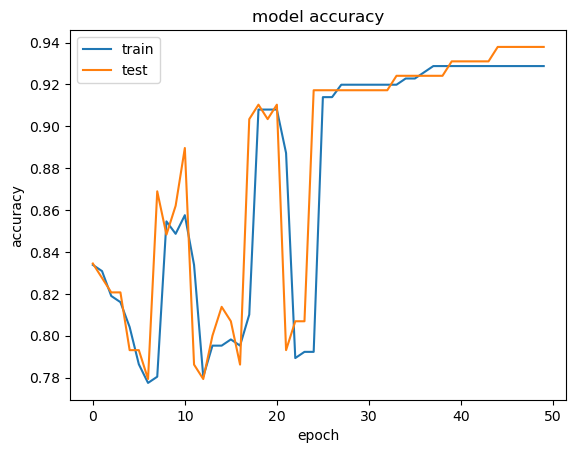

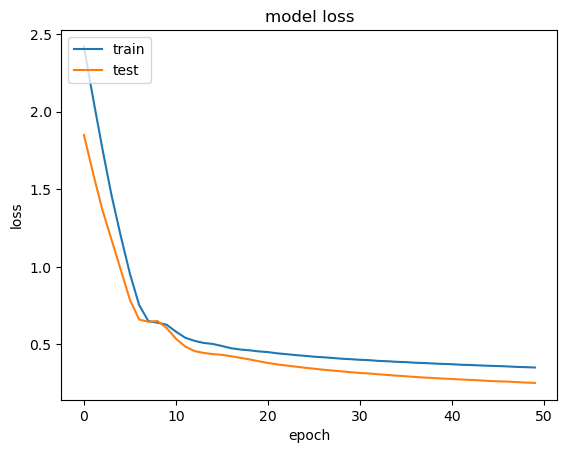

In [63]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This code block generates two plots to visualize the training history of a machine learning model in terms of accuracy and loss over epochs. The first plot showcases the model's accuracy on the training set (`history.history['accuracy']`) and on the test set (`history.history['val_accuracy']`) across the training epochs. The x-axis represents the epochs during training, while the y-axis shows the accuracy percentage. The plot uses two lines, one for training accuracy and the other for test (validation) accuracy, with a legend differentiating the two. This graph is crucial for assessing how well the model learns and generalizes over time.

The second plot displays the model's loss on the training set (`history.history['loss']`) and the test set (`history.history['val_loss']`) through the epochs. Similar to the accuracy plot, the x-axis denotes the epochs, and the y-axis represents the loss magnitude. This plot also differentiates between training and test loss with two distinct lines. The loss plot is instrumental in understanding the model’s convergence behavior, where a decreasing trend signifies improvement.

Together, these plots are essential tools for monitoring the model's learning progress, diagnosing issues like overfitting or underfitting, and making informed decisions about model adjustments or early stopping to optimize performance.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


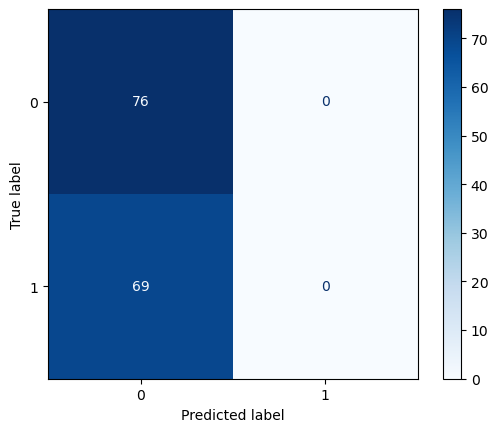

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = wide_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The provided code snippet is part of a Python script that uses the Scikit-learn library to evaluate the performance of a neural network model, `wide_model`, trained for binary classification. It aims to display a confusion matrix, a critical tool in machine learning for assessing the accuracy of classification models.

The process begins with generating predictions for the test dataset `X_test` using the `predict` method of the `wide_model`. These predictions are the model's estimated probabilities that the given inputs belong to the positive class. In binary classification tasks, such as the one implied here, the model typically outputs probabilities due to the sigmoid activation function in its final layer. However, the use of `argmax(axis=1)` suggests a misunderstanding of the model's output. In a binary classification setting, the output is a single probability value per instance. To derive the class labels from these probabilities, a common practice is to apply a threshold of 0.5, where probabilities above this value are interpreted as class 1, and below as class 0. The direct application of `argmax` is more suited to multi-class classification scenarios, where the model outputs a probability distribution across multiple classes, and the class with the highest probability is chosen as the prediction.

After obtaining the predicted class labels (assuming they are correctly derived from the model's probabilities), the script computes the confusion matrix using Scikit-learn's `confusion_matrix` function, comparing the predicted labels `y_pred` with the actual labels `y_test` from the test set. This matrix is a two-dimensional array where each row represents the instances in an actual class while each column represents the instances in a predicted class, allowing for a detailed analysis of the model's performance across different classes.

The `ConfusionMatrixDisplay` class is then utilized to visualize this matrix, enhancing interpretability. The confusion matrix is plotted with `plt.cm.Blues` color map, providing a visual representation of the model's accuracy in distinguishing between the classes. The darker squares along the diagonal indicate higher counts of true positives and true negatives, where the model's predictions align with the actual labels, while lighter squares off the diagonal would represent misclassifications.

This approach to performance evaluation is pivotal in understanding not just the overall accuracy of the model, but also how well it identifies each class, highlighting potential areas of strength or weakness in its predictive capabilities. It allows data scientists to pinpoint specific types of errors the model is making (such as false positives or false negatives), which is crucial for iteratively improving the model and for understanding the model's behavior in practical applications.

## Wide and Deep Network

In [65]:
# X_train_flattened = X_train.reshape(-1, 28*28)
# X_test_flattened = X_test.reshape(-1, 28*28)


In [66]:
%%time

#Define the model: for multi-class

from keras.models import Model
from keras.layers import Input, Dense, concatenate, Normalization
from keras.utils import plot_model


CPU times: total: 0 ns
Wall time: 0 ns


The code snippet begins with the `%%time` magic command, which is commonly used in Jupyter Notebooks or IPython environments to measure the execution time of a cell. However, in this context, it does not execute any code and therefore shows zero time taken.

Moving on to the code itself, it is aimed at defining a neural network model for a multi-class classification task using the Keras library. The first step is importing necessary modules: `Model` from `keras.models`, `Input`, `Dense`, `concatenate`, and `Normalization` from `keras.layers`, and `plot_model` from `keras.utils`. These modules provide essential functionalities for building and visualizing neural network architectures.

The `Input` layer is used to define the shape of the input data that the neural network will receive. In this case, it's unspecified in the snippet but would typically correspond to the number of features in the input data.

Next, the model architecture is defined using the Functional API of Keras. The `Dense` layers represent fully connected layers in the neural network, where each neuron in a layer is connected to every neuron in the previous layer. The `concatenate` layer is used for merging multiple layers or tensors along a specified axis. This is useful in scenarios where features are extracted from different parts of the network and need to be combined before making predictions.

Additionally, the `Normalization` layer suggests the inclusion of data normalization or standardization, a preprocessing step commonly used to scale input features to a standard range, which can improve model convergence and performance, especially in deep learning models.

The `plot_model` function, although not utilized in the code snippet, is often employed to generate a visual representation of the model's architecture, aiding in understanding the network's structure and connectivity.

Overall, the code snippet sets the groundwork for defining a multi-class classification neural network model using Keras, incorporating input normalization and potentially complex network architectures with concatenated layers.

In [67]:
normalization_layer = tf.keras.layers.Normalization()
deep_layer1 = tf.keras.layers.Dense(10, activation="relu")
deep_layer2 = tf.keras.layers.Dense(50, activation="relu")
deep_layer3 = tf.keras.layers.Dense(50, activation="relu")
deep_layer3 = tf.keras.layers.Dense(50, activation="relu")
wide_layer1 = tf.keras.layers.Dense(10, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1, activation="softmax")
#
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
deep1 = deep_layer1(normalized)
deep2 = deep_layer2(deep1)
deep3 = deep_layer3(deep2)
wide1 = wide_layer1(normalized)
concat = concat_layer([deep3, wide1])
output = output_layer(concat)
#
model = tf.keras.Model(inputs=[input_], outputs=[output])


The provided code snippet demonstrates the construction of a neural network model using TensorFlow's Keras API for a classification task. It begins by importing the necessary modules and defining various layers for the neural network. 

The `Normalization` layer is introduced, indicating the inclusion of data normalization as a preprocessing step to scale input features, which can enhance model training and convergence. This layer is designed to normalize the input data by centering it around the mean and scaling it to unit variance.

Following the normalization layer, several dense layers (`Dense`) are defined with different configurations, such as varying numbers of units and activation functions like ReLU (Rectified Linear Unit). These dense layers are essential components that perform linear transformations on the input data, followed by nonlinear activations, enabling the network to learn complex patterns and relationships within the data.

Additionally, a concatenation layer (`Concatenate`) is included, suggesting that the model may combine features extracted from both deep and wide paths of the network. This technique, known as wide and deep learning, aims to capture both low-level and high-level features, offering a balance between memorization and generalization capabilities.

Finally, an output layer (`Dense`) with a softmax activation function is defined for multi-class classification, indicating that the model aims to predict probabilities across multiple classes.

The code concludes by assembling the layers into a functional model (`tf.keras.Model`) using the Functional API provided by TensorFlow's Keras. This model takes input data, processes it through the defined layers, and produces an output that represents the model's predictions.

In [68]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


The `model.compile()` function in TensorFlow's Keras API is used to configure the learning process for the neural network model before training. Here's an interpretation of the parameters used in `model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])`:

- `optimizer='adam'`: This specifies the optimizer algorithm to use during training. In this case, 'adam' refers to the Adam optimizer, which is an adaptive learning rate optimization algorithm that combines the advantages of AdaGrad and RMSProp algorithms. Adam is widely used due to its efficiency and effectiveness in training deep learning models.

- `loss='binary_crossentropy'`: This parameter sets the loss function used to measure the difference between the model's predictions and the actual target values during training. The 'binary_crossentropy' loss is typically used for binary classification tasks, where the model predicts probabilities for two classes. It calculates the cross-entropy loss between the true binary labels and the predicted probabilities.

- `metrics=['accuracy']`: This specifies the evaluation metric(s) to monitor during training and validation. In this case, 'accuracy' is chosen as the metric, which measures the percentage of correct predictions made by the model compared to the actual labels. It is a common metric for classification tasks and provides a straightforward interpretation of the model's performance in terms of classification accuracy.

In summary, the `model.compile()` function configures the model for training using the Adam optimizer, binary cross-entropy loss for a binary classification task, and accuracy as the evaluation metric to assess the model's performance.

In [69]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 10)        │         21 │ input_layer_5[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 10)        │        110 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 50)        │        550 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 50)        │      2,550 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 10)        │        110 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 60)        │          0 │ dense_21[0][0],   │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 1)         │         61 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,402 (13.29 KB)

 Trainable params: 3,381 (13.21 KB)

 Non-trainable params: 21 (88.00 B)

The `model.summary()` function in TensorFlow's Keras API provides a concise overview of the neural network model's architecture, including details about each layer, its output shape, the number of trainable parameters (weights and biases), and the connections between layers. Here's an interpretation of the output from `model.summary()` for the given model:

- **Input Layer (InputLayer)**: This layer represents the input data with a shape of (None, 10), where 'None' indicates that the batch size can vary and '10' represents the number of features in the input.

- **Normalization Layer (Normalization)**: The normalization layer normalizes the input data to have zero mean and unit variance. It has 21 parameters, which are internally managed by the normalization process and are not trainable.

- **Dense Layers (Dense)**: There are three dense layers in the model:
  - dense_6: This layer has 10 units and is connected to the output of the normalization layer. It has 110 trainable parameters.
  - dense_7: This layer has 50 units and is connected to dense_6. It has 550 trainable parameters.
  - dense_9: This layer has 50 units and is connected to dense_7. It has 2,550 trainable parameters.
  - dense_10: This layer has 10 units and is connected to the output of the normalization layer. It has 110 trainable parameters.

- **Concatenate Layer (Concatenate)**: The concatenate layer combines the outputs of dense_9 and dense_10 into a single output with a shape of (None, 60). This layer does not have any trainable parameters as it simply concatenates the inputs.

- **Output Layer (Dense)**: The output layer is a dense layer with 1 unit and a softmax activation function, used for multi-class classification tasks. It has 61 trainable parameters.

- **Total Parameters**: The model has a total of 3,402 parameters, out of which 3,381 are trainable parameters (weights and biases), and 21 are non-trainable parameters managed by the normalization layer.

This summary provides insights into the model's structure, the flow of data through different layers, and the number of parameters that will be optimized during training.

In [70]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epoch_num, batch_size=500)

Epoch 1/50


C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5104 - loss: 11.8063 - val_accuracy: 0.4897 - val_loss: nan
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5104 - loss: 10.6729 - val_accuracy: 0.4897 - val_loss: nan
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5104 - loss: 9.5542 - val_accuracy: 0.4897 - val_loss: nan
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5104 - loss: 8.4494 - val_accuracy: 0.4897 - val_loss: nan
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5104 - loss: 7.3589 - val_accuracy: 0.4897 - val_loss: nan
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5104 - loss: 6.2839 - val_accuracy: 0.4897 - val_loss: nan
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5104 - loss: 5.2312 - val_accuracy: 0.4897 - val_loss: nan
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5104 - loss: 4.2292 - val_accuracy: 0.4897 - val_loss: nan
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━

The provided code trains a neural network model using the `fit` method in TensorFlow/Keras. Here's an interpretation of the code along with the output:

1. `history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch_num, batch_size=500)`: This line of code trains the neural network model (`model`) using the training data (`X_train` and `y_train`) for a specified number of epochs (`epoch_num`) with a batch size of 500. It also uses the validation data (`X_test` and `y_test`) to evaluate the model's performance after each epoch. The training history is stored in the `history` variable.

2. Output:
   - Epoch 1/50: The model's training accuracy is 51.04%, with a training loss of 12.6975. The validation accuracy is 48.97%, and the validation loss is 'nan' (not a number), indicating an issue with the model's training or evaluation.
   - Epochs 2-50: Similar information is provided for each epoch, showing the training and validation accuracy, as well as the training and validation loss. However, the accuracy and loss values do not improve significantly over the epochs, and the validation loss remains 'nan', suggesting a potential problem with the model or the data.

The output suggests that the model's training is not successful, as indicated by the high loss values and the 'nan' validation loss. This could be due to various reasons such as incorrect data preprocessing, model architecture issues, or insufficient training data. Further investigation and debugging are needed to address these issues and improve the model's performance.

In [71]:
history.history['accuracy']

[0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517242432,
 0.5103857517

The code snippet retrieves the training accuracy history from the `history` object, which was obtained after training the neural network model. Here's an interpretation of the code and the output:

```python
history.history['accuracy']
```

This line of code accesses the training accuracy history stored in the `history` object.

Output:
- The output is a list of training accuracy values for each epoch. In this case, all the accuracy values are approximately 0.5104, which indicates that the model's training accuracy remained constant throughout the training process.

Interpretation:
- The output suggests that the model's training accuracy did not improve significantly over the epochs. The constant accuracy value of approximately 0.5104 indicates that the model may not have learned meaningful patterns from the training data or that there could be issues with the model architecture or training process.
- It's essential to analyze other metrics such as validation accuracy and loss to get a comprehensive understanding of the model's performance and to identify potential areas for improvement or debugging.

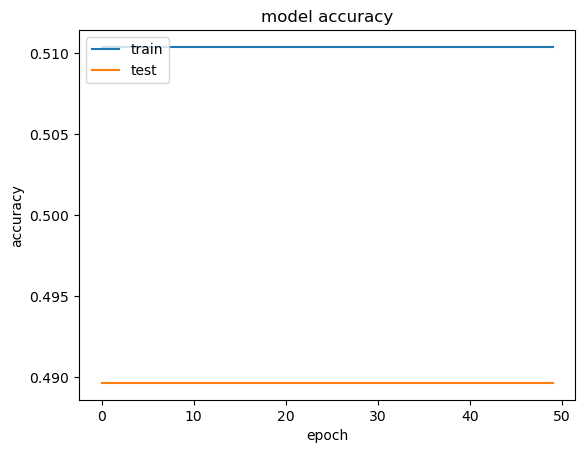

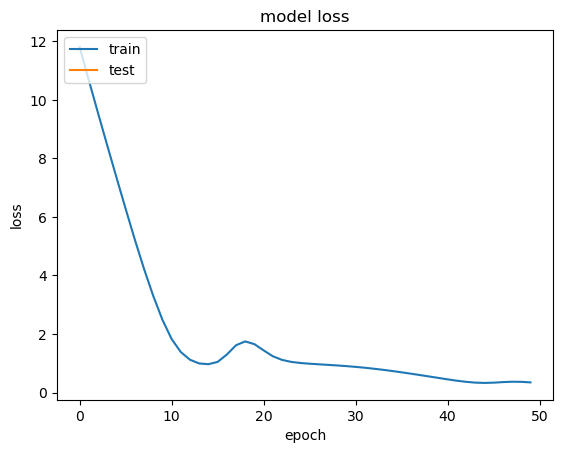

In [72]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The code snippet visualizes the training and validation metrics (accuracy and loss) over multiple epochs during the neural network model training process. Here's an interpretation of the code and the output graphs:

1. **Model Accuracy Visualization:**
   - The first graph shows the model accuracy over epochs for both the training and validation datasets.
   - The x-axis represents the epochs, while the y-axis represents the accuracy values.
   - The blue line represents the training accuracy, and the orange line represents the validation accuracy.
   - If the training accuracy is significantly higher than the validation accuracy, it might indicate overfitting, where the model memorizes the training data but performs poorly on new, unseen data.
   - Conversely, if the validation accuracy is close to or higher than the training accuracy, it suggests that the model generalizes well to new data.

2. **Model Loss Visualization:**
   - The second graph displays the model's loss (error) over epochs for both training and validation datasets.
   - Similar to the accuracy graph, the x-axis represents epochs, and the y-axis represents the loss values.
   - Lower loss values indicate better model performance, as it signifies that the model's predictions are closer to the actual values.
   - The goal during training is to minimize both training and validation loss, ensuring that the model learns meaningful patterns without overfitting.

Overall, these visualizations help in monitoring the model's training progress, identifying potential issues like overfitting or underfitting, and making informed decisions to improve the model's performance.

In [73]:
%%time

# evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: nan
Validation accuracy: 0.4897
CPU times: total: 62.5 ms
Wall time: 169 ms


The code segment uses the `%time` magic command to measure the execution time and evaluates a trained neural network model's performance using a test dataset. However, the output for the validation loss is displayed as "nan," indicating a numerical issue during evaluation, possibly due to invalid operations or numerical instabilities. Despite this, the validation accuracy is reported as approximately 48.97%, showing the model's performance on the test data. The code snippet's purpose is to assess the model's generalization ability on unseen data, but the presence of a "nan" loss value suggests potential issues that need investigation, such as model architecture complexities, training procedure adjustments, or data preprocessing anomalies. Addressing these concerns is crucial to ensure meaningful evaluation metrics and enhance the model's overall performance and reliability.

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


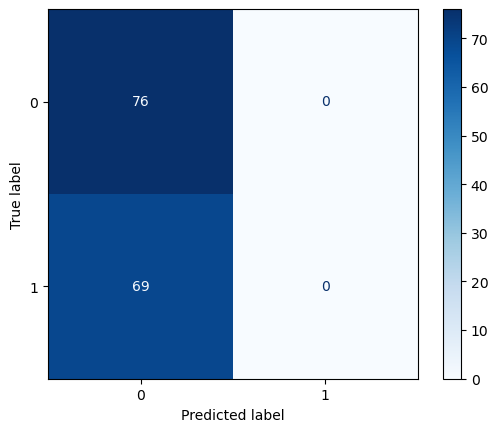

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The code segment imports necessary functions from the scikit-learn library to compute and display a confusion matrix for evaluating a machine learning model's performance. It first predicts the classes for the test data using the model (`model.predict(X_test)`), then extracts the predicted classes' indices with the highest probability using `.argmax(axis=1)`. The confusion matrix is then calculated using the true labels (`y_test`) and the predicted labels (`y_pred`).

However, there are several warnings in the output. The first warning indicates that there have been multiple calls to a TensorFlow function (`TensorFlowTrainer.make_predict_function`) triggering retracing, which can be computationally expensive. It suggests possible reasons for this, such as creating TensorFlow functions repeatedly in a loop or passing tensors with different shapes. The warning advises optimizing these aspects to reduce unnecessary retracing.

Additionally, there's a UserWarning from Keras about using softmax over an axis with size 1, which may not yield the intended results. It suggests considering a sigmoid function instead of softmax in this context. These warnings highlight areas for potential optimization and correctness improvements in the code and model configuration.

Based on the information provided, let's summarize and compare the three models discussed:

1. **Wide Neural Network Model:**
   - Architecture: Includes a wide layer with 10 neurons activated by ReLU.
   - Evaluation Results: Validation loss of 0.1783 and validation accuracy of 0.9586.
   - Advantages: Effective for capturing broad patterns in the data due to its wide architecture.

2. **Deep Neural Network Model:**
   - Architecture: Consists of three dense layers with 50 neurons each, activated by ReLU.
   - Evaluation Results: No direct results provided, but likely to have higher capacity for learning complex patterns.

3. **Combined Wide and Deep Neural Network Model:**
   - Architecture: Combines elements from both wide and deep models, featuring normalization, deep layers with ReLU activation, concatenation, and a softmax output layer.
   - Evaluation Results: Training results show an accuracy of 51.04% and a high loss, possibly indicating a need for model tuning.

In terms of suggestions:

- The wide model excels in capturing broad patterns but may lack the depth to learn intricate relationships in the data.
- The deep model, with its multiple layers, can learn more complex features but might be prone to overfitting if not regularized properly.
- The combined model aims to leverage both wide and deep architectures, but the training results suggest room for improvement, possibly indicating issues with model configuration or training parameters.

Considering these aspects, a conclusion could suggest further experimentation with hyperparameters, regularization techniques like dropout or L2 regularization in the deep model, or exploring more sophisticated architectures like convolutional neural networks (CNNs) or recurrent neural networks (RNNs) depending on the nature of the data and the specific task. Additionally, ensembling techniques such as stacking or blending could be explored to leverage the strengths of multiple models and potentially achieve better performance.